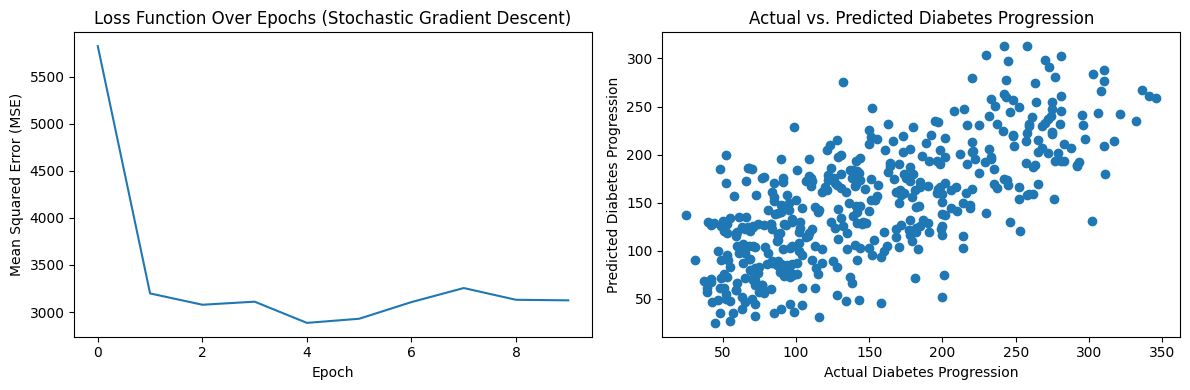

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the LinearRegressionSGD class
class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_epochs=10, random_state=None):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        for _ in range(self.n_epochs):
            total_loss = 0
            for i in range(n_samples):
                random_index = np.random.randint(n_samples)
                x_i = X[random_index]
                y_i = y[random_index]

                prediction = self._predict(x_i)
                error = y_i - prediction

                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

                loss = error ** 2
                total_loss += loss

            average_loss = total_loss / n_samples
            self.loss_history.append(average_loss)

    def _predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return np.array(predictions)

# Instantiate and fit the LinearRegressionSGD model
model = LinearRegressionSGD(learning_rate=0.01, n_epochs=10, random_state=42)
model.fit(X_scaled, y)

# Plot the loss function over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Function Over Epochs (Stochastic Gradient Descent)")

# Make predictions on the scaled features
predictions = model.predict(X_scaled)

plt.subplot(1, 2, 2)
plt.scatter(y, predictions)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs. Predicted Diabetes Progression")

plt.tight_layout()
plt.show()


In [2]:
# After fitting the model, print the final Mean Squared Error
final_mse = model.loss_history[-1]
print("Final Mean Squared Error:", final_mse)


Final Mean Squared Error: 3124.3077036051945
